# Subsetting data

This tutorial show how to subset variables using the compute api

You need to get your API key from [here](https://aims2.llnl.gov/user/profile) and possibly authenticated via my_proxy_client or OAuth2 if the files you're trying to use require it.

In [ ]:
import os
import cwt

wps_url = os.environ.get('WPS_URL', 'https://aims2.llnl.gov/wps')
verify = bool(os.environ.get('WPS_VERIFY', True))
compute_token = os.environ.get('WPS_TOKEN', '<token>')

client = cwt.WPSClient(wps_url, compute_token=compute_token, verify=verify)
client

In [2]:
# (600, 90, 144)
inputs = cwt.Variable('http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r10i1p1f1/Amon/tas/gn/v20180830/tas_Amon_GISS-E2-1-G_historical_r10i1p1f1_gn_190101-195012.nc', 'tas')

In [3]:
d0 = cwt.Domain(time=('1912', '1925'), lat=(0, 90), lon=(180, 360))
d0

Domain(dimensions={'time': Dimension(name='time', start='1912', end='1925', step=1, crs=CRS(name='timestamps')), 'lat': Dimension(name='lat', start=0, end=90, step=1, crs=CRS(name='values')), 'lon': Dimension(name='lon', start=180, end=360, step=1, crs=CRS(name='values'))}, mask=None, name='749c3593-5409-4638-8401-f4af9ac46b77')

In [4]:
proc = client.CDAT.subset(inputs, domain=d0)
proc

Process(name=8958bddc-bd9b-4ccc-8c5d-3799f776cfa0, identifier=CDAT.subset, inputs=[Variable(name='5c814d50-a38a-454d-bab1-9516bfd79dd6', uri='http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r10i1p1f1/Amon/tas/gn/v20180830/tas_Amon_GISS-E2-1-G_historical_r10i1p1f1_gn_190101-195012.nc', var_name='tas', domain=None, mime_type=None)], parameters={}, domain=Domain(dimensions={'time': Dimension(name='time', start='1912', end='1925', step=1, crs=CRS(name='timestamps')), 'lat': Dimension(name='lat', start=0, end=90, step=1, crs=CRS(name='values')), 'lon': Dimension(name='lon', start=180, end=360, step=1, crs=CRS(name='values'))}, mask=None, name='749c3593-5409-4638-8401-f4af9ac46b77'), title=CDAT.subset, process_outputs=[], data_inputs=[], status_supported=None, store_supported=None, process_version=devel)

In [5]:
client.execute(proc)

proc.wait()

ProcessAccepted None
ProcessAccepted Validating inputs of CDAT.subset (1c5b84c8-1176-4bb9-bb1e-422ccb8c9b0a)
ProcessStarted Building output for '1c5b84c8-1176-4bb9-bb1e-422ccb8c9b0a' - 'CDAT.subset' 0
ProcessSucceeded None


True

In [6]:
import cdms2

f = cdms2.open(proc.output.uri)

tas = f[proc.output.var_name]

# (168, 45, 72)
print(tas.shape)

(168, 45, 72)


/opt/conda/envs/jupyterlab/lib/python3.8/site-packages/cdms2/tvariable.py:281: DeprecationWarning: Non-scalar arrays for the fill value are deprecated. Use arrays with scalar values instead. The filled function still supports any array as `fill_value`.
  self._missing = numpy.array(value).astype(self.dtype)


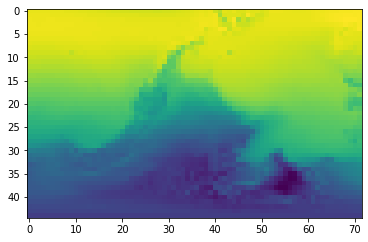

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.imshow(tas[0])